In [3]:
import mysql.connector
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', module='pandas')

Conexión al Mysql

In [4]:
conn = mysql.connector.connect(
    host="localhost",
    port ="3306",
    user="root",
    password="09876",
    database="global_market"
)

# Carreguem totes les taules

In [5]:
tables = [
    "dim_user",
    "dim_products",
    "dim_credit_cards",
    "dim_targetes_estat",
    "fact_transaction",
    "fact_transaction_products"
]

dfs = {}

for table in tables:
    dfs[table] = pd.read_sql(f"SELECT * FROM {table};", conn)

# Acceso a cada dataframe:
df_user = dfs["dim_user"]
df_products = dfs["dim_products"]
df_credit_cards = dfs["dim_credit_cards"]
df_targetes_estat = dfs["dim_targetes_estat"]
df_fact_transaction = dfs["fact_transaction"]
df_fact_transaction_products = dfs["fact_transaction_products"]

In [6]:
conn.close()


In [7]:
df_fact_transaction_products.head()

,id_transaction,id_products
0,001A60EA-DC9C-4E5A-9460-6628B100E7E1,1
1,0032F0BB-BBE6-4AA5-B5EE-EEAD533C0C48,1
2,00342381-503D-422D-85AB-F2D4FFAAD4C7,1
3,004C0A80-E537-46D8-BE44-343D2176DF15,1
4,004D1DB5-B2CB-4460-98B6-31C42CA96E5F,1


In [8]:
df_user.head()

,id_user,name,surname,phone,email,birth_date,country,city,postal_code,address
0,1,Zeus,Gamble,1-282-581-0551,interdum.enim@protonmail.edu,1985-11-17,United States,New York,10001,348-7818 Sagittis St.
1,10,Robert,Mccarthy,(324) 746-6771,fermentum@protonmail.com,1984-04-30,United States,San Jose,95101,P.O. Box 773
2,100,Melodie,Mclean,1-677-221-7152,risus.varius@google.ca,1989-09-15,United States,San Jose,95101,Ap #644-8492 Sagittis St.
3,1000,Amkjrv,Qbulrxbp,+48-258-9936,amkjrv.qbulrxbp@example.com,1970-05-17,Germany,Stuttgart,70173,215 Qbulrxbp St
4,1001,Nfvrlb,Oydaiwbg,+94-121-2522,nfvrlb.oydaiwbg@example.com,1994-03-04,Germany,Cologne,50667,121 Oydaiwbg St


In [9]:
df_products.head()

,id_products,product_name,price,colour,weight,warehouse_id
0,1,Direwolf Stannis,$161.11,#7c7c7c,1,WH-4
1,10,Karstark Dorne,$119.52,#f4f4f4,2.4,WH--5
2,100,south duel,$40.43,#6d6d6d,3,WH--95
3,11,Karstark Dorne,$49.70,#141414,2.7,WH--6
4,12,duel Direwolf,$181.60,#a8a8a8,2.1,WH--7


In [10]:
df_products["price"].unique()[:10]

array(['$161.11', '$119.52', '$40.43', '$49.70', '$181.60', '$139.59',
       '$147.53', '$194.29', '$180.91', '$91.89'], dtype=object)

Eliminar el símbolo $ y convertir a float, variable Price

In [11]:
df_products["price"] = df_products["price"].astype(str)

In [12]:
df_products["price"] = df_products["price"].str.replace("$", "", regex=False)
df_products["price"] = pd.to_numeric(df_products["price"], errors="coerce")

In [13]:
df_products.head(5)


,id_products,product_name,price,colour,weight,warehouse_id
0,1,Direwolf Stannis,161.11,#7c7c7c,1,WH-4
1,10,Karstark Dorne,119.52,#f4f4f4,2.4,WH--5
2,100,south duel,40.43,#6d6d6d,3,WH--95
3,11,Karstark Dorne,49.70,#141414,2.7,WH--6
4,12,duel Direwolf,181.60,#a8a8a8,2.1,WH--7


In [14]:
df_credit_cards.head()

,id_credit_card,user_id,iban,pan,pin,cvv,track1,track2,expiring_date
0,CcS-4857,276,XX4857591835292505850771,2314242385113924,1819,467,%B2314242385113924^LWCBUDLWCBUD^22060000000000...,%B2314242385113924=2410101518363164?,2025-09-27
1,CcS-4858,277,XX8581768137002436094025,6582720299715533,3964,817,%B6582720299715533^TIQMVITIQMVI^24040000000000...,%B6582720299715533=2411101104546272?,2028-12-28
2,CcS-4859,278,XX7826930491423553609370,8861684536289642,4983,277,%B8861684536289642^COFBGDCOFBGD^28020000000000...,%B8861684536289642=2502101761665371?,2026-11-26
3,CcS-4860,279,XX5559590368835304645299,2481155515498459,6876,661,%B2481155515498459^TIUJTUTIUJTU^31040000000000...,%B2481155515498459=2602101514414395?,2027-07-27
4,CcS-4861,280,XX2035182877195191627307,1308930301149557,5710,398,%B1308930301149557^HPOBNZHPOBNZ^33010000000000...,%B1308930301149557=2805101751305028?,2026-04-25


In [15]:
df_targetes_estat.head()

,card_id,estat_targeta
0,CcS-4857,Activa
1,CcS-4858,Activa
2,CcS-4859,Activa
3,CcS-4860,Activa
4,CcS-4861,Activa


In [16]:
df_fact_transaction.head()

,id_transaction,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude
0,00043A49-2949-494B-A5DD-A5BAE3BB19DD,CcS-9294,b-2458,2024-08-28 07:16:46,395.43,0,"16, 26, 97, 87",4713,46.199929,1.435540
1,000447FE-B650-4DCF-85DE-C7ED0EE1CAAD,CcS-5019,b-2370,2016-12-21 20:07:18,155.63,0,"66, 69, 87",438,41.597206,12.221760
2,00045D6B-ED2E-4F2F-8186-CEE074D875D0,CcS-6699,b-2390,2020-07-14 15:37:45,326.01,0,"30, 11, 16, 81",2118,29.757296,-95.379637
3,000481C3-1C26-4FEF-83A0-4CD0EB004BBD,CcS-6696,b-2230,2017-09-04 19:44:53,161.60,0,72,2115,53.548884,-113.503053
4,00051AA4-9CBE-4268-B070-C38062A1B3E2,CcS-7606,b-2266,2017-01-05 18:19:25,148.91,0,18,3025,52.208370,5.690806


In [17]:
print("df_products columns:", df_products.columns.tolist())
print("df_fact_transaction columns:", df_fact_transaction.columns.tolist())
print("df_user columns:", df_user.columns.tolist())
print("df_credit_cards columns:", df_credit_cards.columns.tolist())
print("df_targetes_estat columns:", df_targetes_estat.columns.tolist())
print("df_fact_transaction_products columns:", df_fact_transaction_products.columns.tolist())

df_products columns: ['id_products', 'product_name', 'price', 'colour', 'weight', 'warehouse_id']
df_fact_transaction columns: ['id_transaction', 'card_id', 'business_id', 'timestamp', 'amount', 'declined', 'product_ids', 'user_id', 'lat', 'longitude']
df_user columns: ['id_user', 'name', 'surname', 'phone', 'email', 'birth_date', 'country', 'city', 'postal_code', 'address']
df_credit_cards columns: ['id_credit_card', 'user_id', 'iban', 'pan', 'pin', 'cvv', 'track1', 'track2', 'expiring_date']
df_targetes_estat columns: ['card_id', 'estat_targeta']
df_fact_transaction_products columns: ['id_transaction', 'id_products']


In [18]:
df_products.dtypes

id_products      object
product_name     object
price           float64
colour           object
weight           object
warehouse_id     object
dtype: object

In [19]:
df_credit_cards.dtypes

id_credit_card    object
user_id            int64
iban              object
pan               object
pin               object
cvv               object
track1            object
track2            object
expiring_date     object
dtype: object

In [20]:
df_fact_transaction.dtypes

id_transaction            object
card_id                   object
business_id               object
timestamp         datetime64[ns]
amount                   float64
declined                   int64
product_ids               object
user_id                   object
lat                      float64
longitude                float64
dtype: object

In [21]:
df_fact_transaction_products.dtypes

id_transaction    object
id_products       object
dtype: object

In [22]:
df_user.dtypes

id_user        object
name           object
surname        object
phone          object
email          object
birth_date     object
country        object
city           object
postal_code    object
address        object
dtype: object

# **Una variable numèrica**

In [23]:
df_fact_transaction["amount"].describe()

count    100000.000000
mean        259.015312
std         148.539811
min           2.120000
25%         148.910000
50%         244.235000
75%         361.470000
max         876.660000
Name: amount, dtype: float64

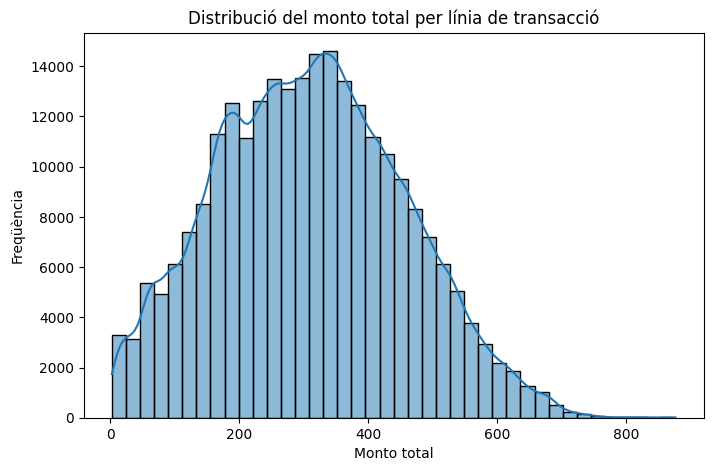

In [54]:
plt.figure(figsize=(8,5))
sns.histplot(df_full['amount'].dropna(), kde=True, bins=40)
plt.title('Distribució del monto total per línia de transacció')
plt.xlabel('Monto total')
plt.ylabel('Freqüència')
plt.show()

# RESULTAT FINAL: 
La gràfica mostra que els imports de les transaccions no són simètrics, sinó clarament concentrats en valors baixos
i mitjans, amb una cua llarga cap a imports alts.
La major part de les operacions es troben entre aproximadament 50 i 350 dollars.
El pic principal sembla al voltant dels 150–250 dollars, de manera que mitjana i mediana probablement se situen en aquesta franja, es fa describe() per fer la comprovació.
Les transaccions molt grans són rares però existeixen; això pot tenir importància per a control de risc, detecció de frau o definició de límits, perquè tot i ser poc freqüents poden tenir molt pes econòmic

**Dues variables numèriques**

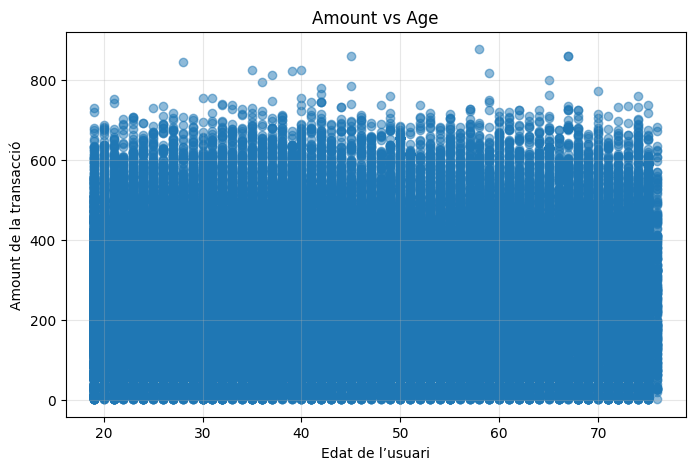

In [24]:

from datetime import datetime

# Calcular edat
today = pd.to_datetime('today')
df_user['age'] = (today - pd.to_datetime(df_user['birth_date'])).dt.days // 365

# Unir transaccions amb usuaris
df_tx_user = df_fact_transaction.merge(
    df_user[['id_user', 'age']],
    left_on='user_id',
    right_on='id_user',
    how='inner'
)

plt.figure(figsize=(8, 5))
plt.scatter(df_tx_user['age'], df_tx_user['amount'], alpha=0.5)
plt.xlabel('Edat de l’usuari')
plt.ylabel('Amount de la transacció')
plt.title('Amount vs Age')
plt.grid(True, alpha=0.3)
plt.show()

**Una variable categòrica + variable númerica**

In [25]:
df_products.groupby("product_name")["price"].sum().reset_index().sort_values(by="price", ascending=False).head(10)

,product_name,price
57,skywalker ewok,501.53
64,the duel,416.35
10,Karstark warden,407.29
17,Stannis warden,362.78
27,Winterfell,344.44
0,Direwolf,343.15
44,north,339.88
36,duel warden,285.38
2,Direwolf Stannis,282.81
33,duel Direwolf,278.50


In [26]:
top_price = (
    df_products.groupby("product_name")["price"]
    .sum()
    .reset_index()
    .sort_values(by="price", ascending=False)
    .head(10)
)

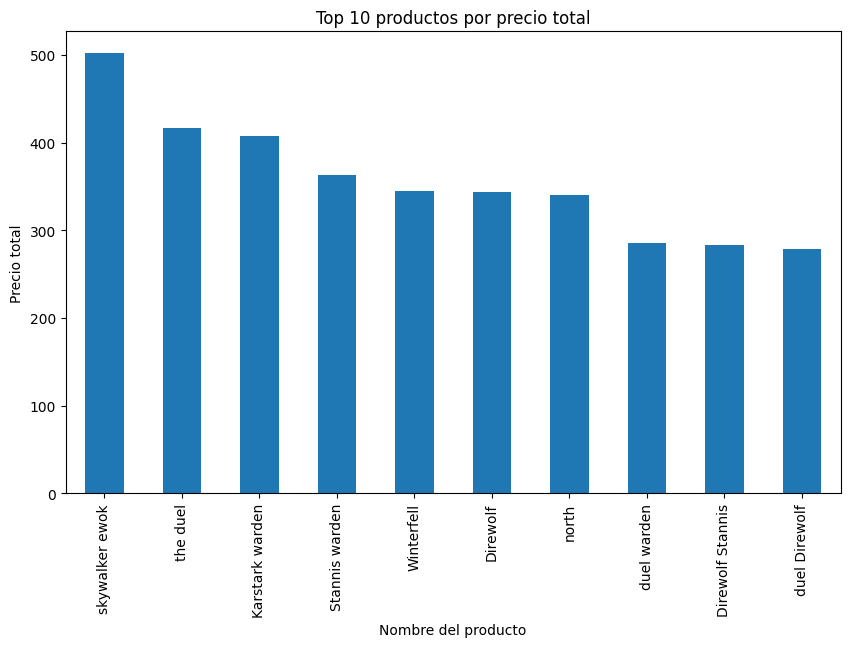

In [27]:
#Generem un codi de barres que mostra els 10 productes més cars, cada codi de barres representa un producte 
# i la seva alçada indica el preu total acumulat d'aquest producte.

top_price.plot(kind="bar", x="product_name", y="price", figsize=(10,6), legend=False)
plt.title("Top 10 productos por precio total")
plt.xlabel("Nombre del producto")
plt.ylabel("Precio total")
plt.show()



RESULTAT FINAL: Aquests 10 productes del gràfic concentren el major volum d'ingressos, on Skywalker ework destaca clarament com a líder en facturació total. Skywalker genera al voltant de 500 $, força per sobre de la resta i per tant, es pot dir, que es el producte estratègic a protegir i potenciar.
La resta de productes del top (com “the duel”, “Karstark warden” o “Stannis warden”) formen un segon grup amb ingressos similars, entre aproximadament 350 i 420, que aporten una base sòlida però més diversificada. Per un altre costat, la dependència en un únic producte molt fort suggereix revisar riscos (canvis de demanda, competència) i valorar campanyes per impulsar els productes del segon grup i reduir concentració.


In [28]:
df_fact_transaction.groupby("user_id")["amount"].sum().reset_index().sort_values(by="amount", ascending=False).head(10)

,user_id,amount
2100,289,41486.54
2423,318,40348.50
3945,455,34491.27
3523,417,32016.11
945,185,30333.03
2056,285,29249.51
1034,193,25485.05
3934,454,24353.91
2767,349,23504.47
2412,317,18991.45


In [29]:
top_users = (
    df_fact_transaction.groupby("user_id")["amount"]
    .sum()
    .reset_index()
    .sort_values(by="amount", ascending=False)
    .head(10)
)

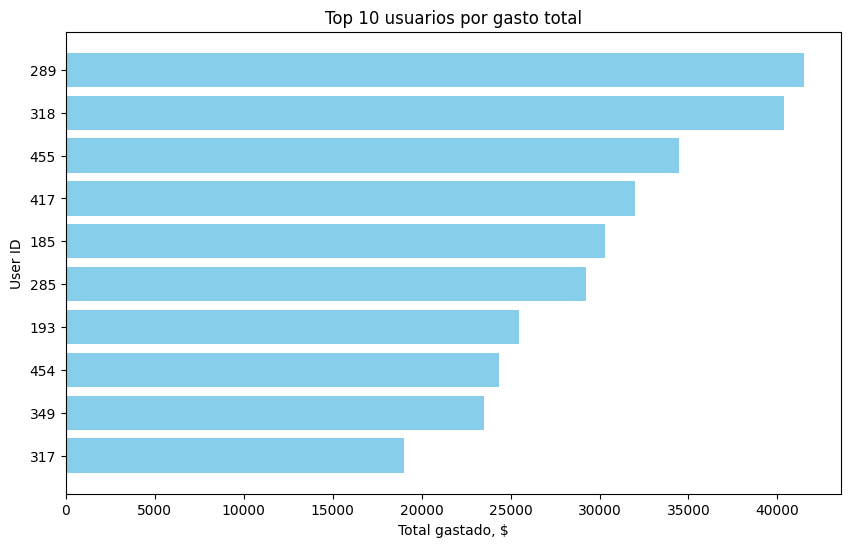

In [30]:
plt.figure(figsize=(10,6))
plt.barh(top_users["user_id"].astype(str), top_users["amount"], color="skyblue")
plt.gca().invert_yaxis()  # para que el mayor esté arriba
plt.xlabel("Total gastado, $")
plt.ylabel("User ID")
plt.title("Top 10 usuarios por gasto total")
plt.show()

RESUM: Tenim TOP 10 usuaris per despesa total, s'observa una clara concentració del consum en un grup molt reduit de clients. L'usuari identificat com 289 que lidera el ranking amb una despesa + 40000 dolars, seguit del client 318, ens indica que existeixen clients d'alt valor per el negoci.
a partir del 3r lloc, hi ha una disminució progressiva de valors que estan entre 35000 y 20000 $, això indica que tenim una base solida d'usuaris amb un alt poder despesa. En altres paraules, hi ha una dependencia d'aquest 10 usuaris, especialment dels dos primers, el TOP 10 es la font d'ingressos, i aquest usuaris son un sector estratègic, per aixó s'han de protegir però al mateix tens ens hem de desenvolupar estratègies per ampliar la base d'usuaris rentables.

In [31]:
df_fact_transaction.groupby("business_id")["amount"].sum().reset_index().sort_values(by="amount", ascending=False).head(10)

,business_id,amount
0,b-2222,683966.05
88,b-2574,414925.50
20,b-2302,414651.33
27,b-2330,409628.90
32,b-2350,408708.76
70,b-2502,407087.28
36,b-2366,406287.68
64,b-2478,405185.99
98,b-2614,404392.03
80,b-2542,400578.14


In [32]:
top_companies = (
    df_fact_transaction.groupby("business_id")["amount"]
    .sum()
    .reset_index()
    .sort_values(by="amount", ascending=False)
    .head(10)
)

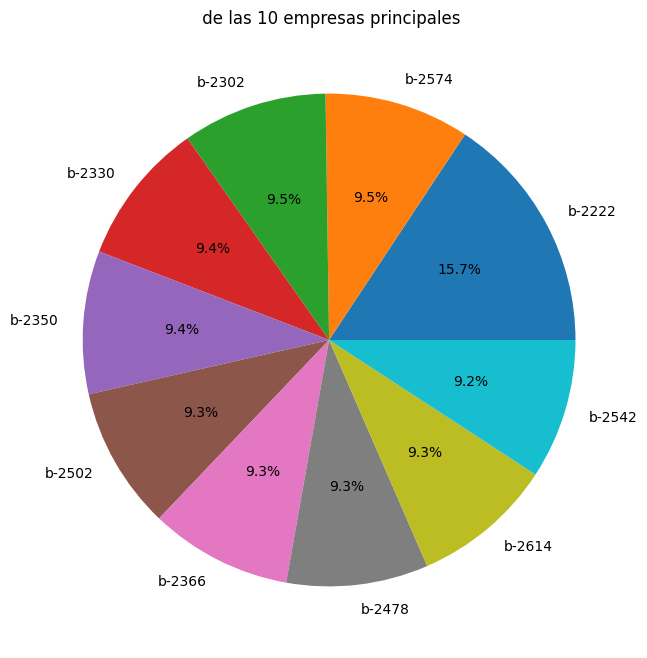

In [33]:
top_companies.set_index("business_id")["amount"].plot(
    kind="pie", figsize=(8,8), autopct="%1.1f%%"
)
plt.ylabel("")
plt.title(" de las 10 empresas principales")
plt.show()

RESUM: representem la distribució porcentual de les 10 empreses principals, s'observa una distribució , molt semblant entre elles. Destaca B-2222 que concentra aproximadament el 15,7% del total situant-se clarament amb l'empresa amb més pes. La resta tenen una participació molt homogènia que esta entre 9-9.5%. fet que indica una estructura poc concentrada i sense dependència excessiva d’un únic actor, més enllà del lideratge moderat de b-2222. Això indica que el mercat està ben diversificat, amb un lider clar (B-2222), però no dominat, inidicant un risc de concentració baix, suggerint estabilitat, amb oportunitats de creixement o optimització repartides entre diversos actors rellevants.

# ** VARIABLE CATEGORICA**

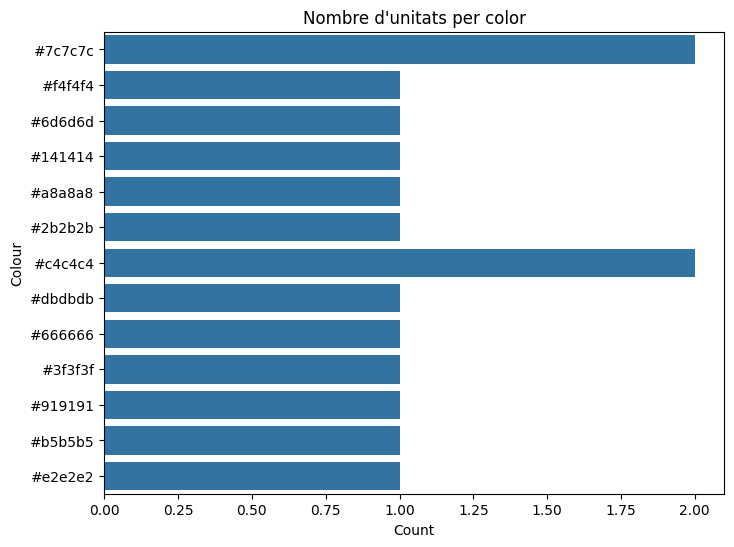

In [34]:
df_top5 = df_products.head(15)

plt.figure(figsize=(8,6))
sns.countplot(data=df_top5, y='colour')
plt.title("Nombre d'unitats per color")
plt.xlabel('Count')
plt.ylabel('Colour')
plt.show()

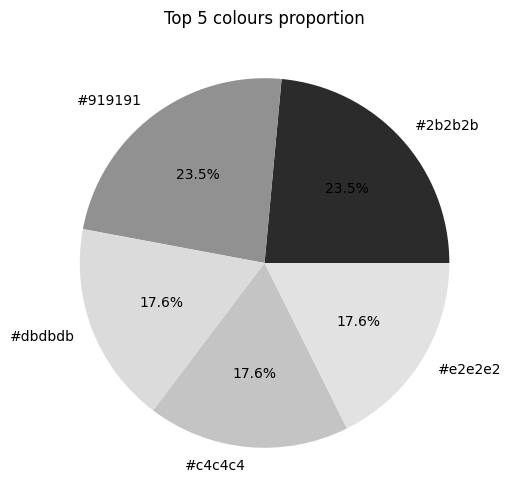

In [35]:
counts = df_products['colour'].value_counts().nlargest(5)
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=counts.index)
plt.title('Top 5 colours proportion')
plt.show()

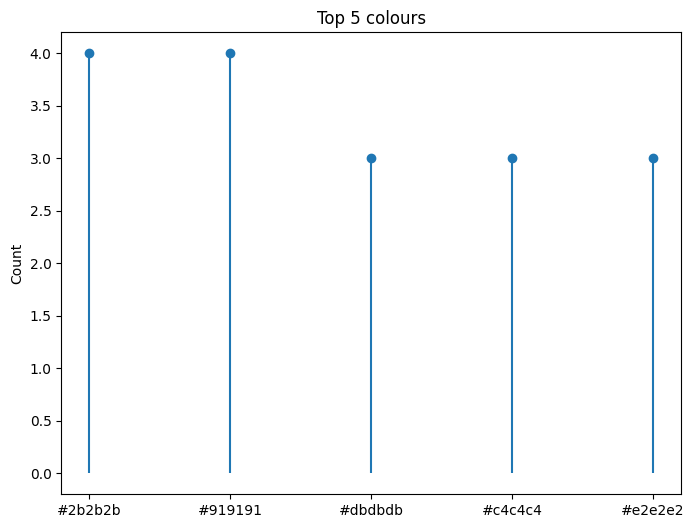

In [36]:
counts = df_products['colour'].value_counts().nlargest(5)
plt.figure(figsize=(8,6))
plt.stem(counts.index, counts.values, basefmt=" ")
plt.title('Top 5 colours')
plt.ylabel('Count')
plt.show()

# **Dues variables categòriques**

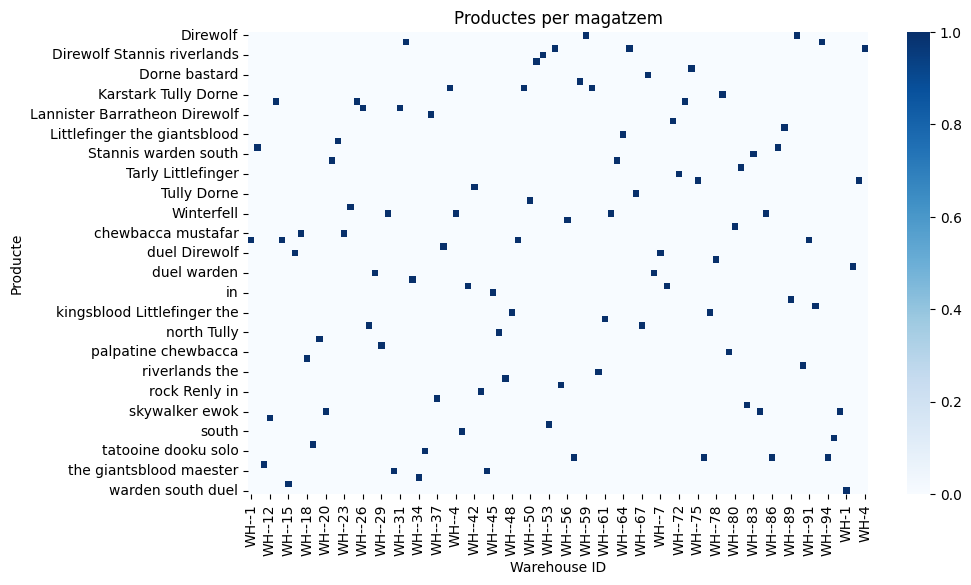

In [37]:
cross = pd.crosstab(
    df_products['product_name'],
    df_products['warehouse_id']
)

plt.figure(figsize=(10, 6))
sns.heatmap(cross, annot=False, cmap='Blues')
plt.title("Productes per magatzem")
plt.xlabel("Warehouse ID")
plt.ylabel("Producte")
plt.show()


S'observa que la distribució de productes en magatzems sembla bastant dispersa i irregular, no hi ha cap magatzem que sigui tots els peoductes, ni cap producte que estigui present a tots els magatzems. Es pot concluir, que no s'aprecien patrons clars de concentració, la distribució es heterogènia. Podria ser que cada magatzem està especialitzar en un conjunt diferent de preoductes.

# **Tres variables combinades**

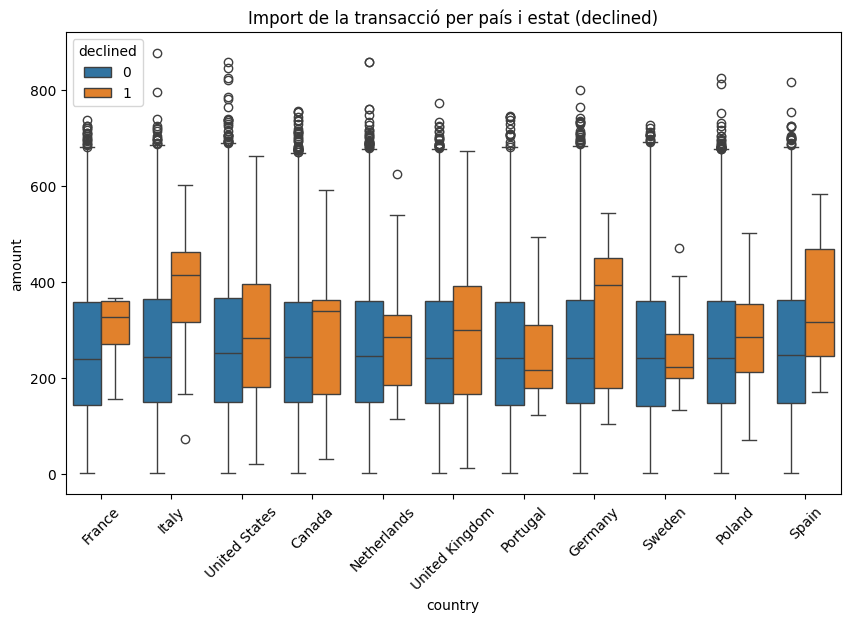

In [38]:
df_tx_country = df_fact_transaction.merge(
    df_user[['id_user', 'country']],
    left_on='user_id',
    right_on='id_user',
    how='inner'
)
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_tx_country,
    x='country',
    y='amount',
    hue='declined'
)
plt.xticks(rotation=45)
plt.title("Import de la transacció per país i estat (declined)")
plt.show()

Tenim de la transacció per país i estat. En tots els països, la mediana de les transaccions rebutjades és més alta que la de les acceptades, es a dir, en tots els països , la mediana de les transaccions rebutjades és més alta que la de les acceptades. Aiximateix, com més alt és l'import, més probabilitat hi ha que la transacció sigui rebutjada.

# **Pairplot**

In [39]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_products   100 non-null    object 
 1   product_name  100 non-null    object 
 2   price         100 non-null    float64
 3   colour        100 non-null    object 
 4   weight        100 non-null    object 
 5   warehouse_id  100 non-null    object 
dtypes: float64(1), object(5)
memory usage: 4.8+ KB


In [40]:
df_products.dtypes

id_products      object
product_name     object
price           float64
colour           object
weight           object
warehouse_id     object
dtype: object

In [41]:
df_products["price"] = pd.to_numeric(df_products["price"], errors="coerce")
df_products["weight"] = pd.to_numeric(df_products["weight"], errors="coerce")

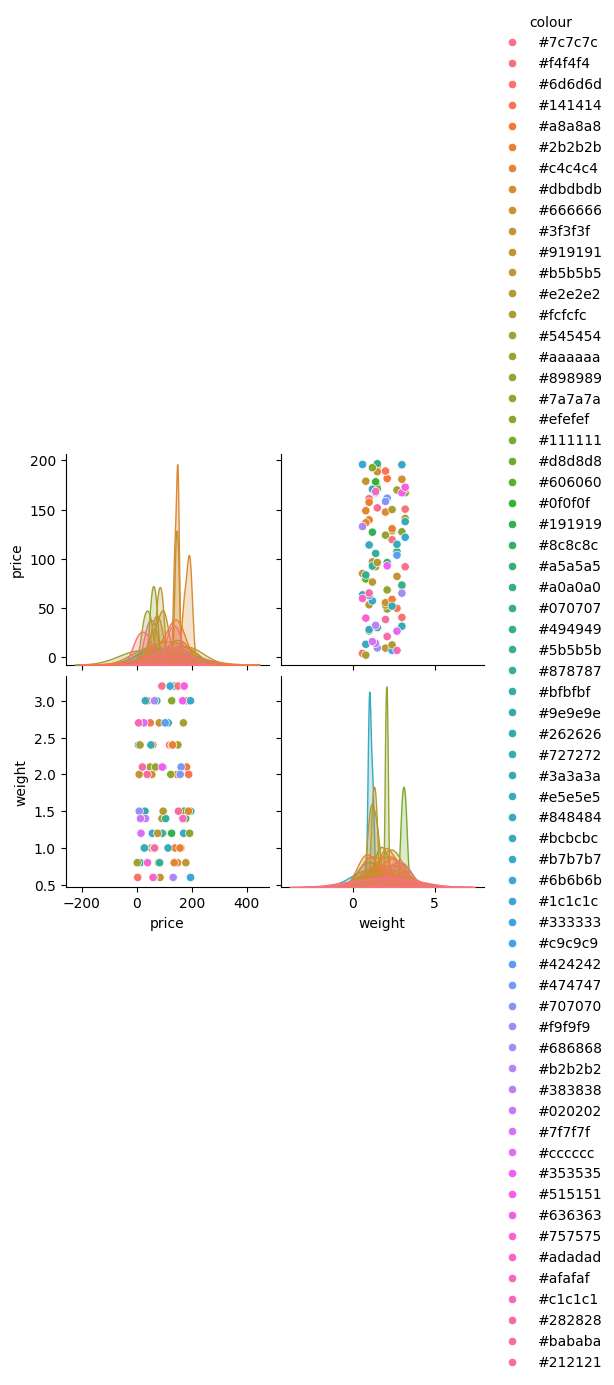

In [42]:
sns.pairplot(df_products, vars=["price","weight"], hue="colour")
plt.show()

Selecionem només 15 primers per obtenir un gràfic més ordenat

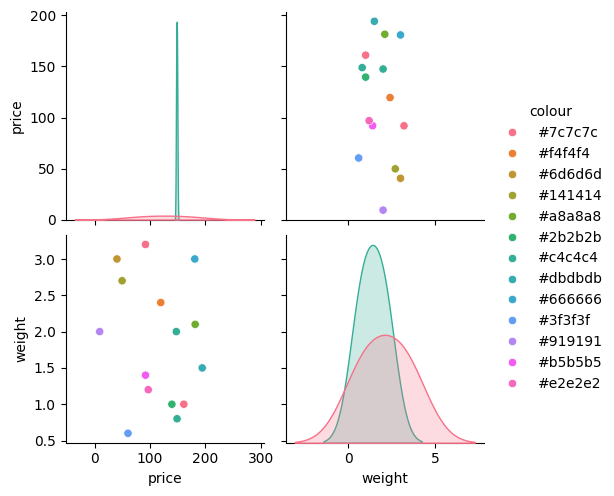

In [43]:
sns.pairplot(
    df_products.head(15),
    vars=["price", "weight"],
    hue="colour"
)
plt.show()

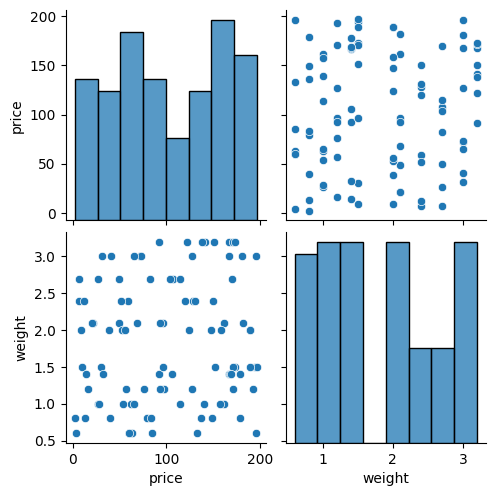

In [44]:
import seaborn as sns
sns.pairplot(df_products.select_dtypes(include="number"))
plt.show()

No és veu una tendència clara entre el pes i el preu. El preu no depend del pes. La distribució de preus mostra concentració en una franja concreta: aquest és el teu nostre rang de mercat principal; la resta poden ser nínxols que caldria validar si generen prou volum o marge. Revisar aquests grups permetria simplificar el catàleg o diferenciar millor les gammes.

**NIVELL II**

 Representa la correlació d'algunes variables i interpreta els resultats segons les teves dades.

In [45]:

df_tx_user = df_fact_transaction.merge(
    df_user,
    left_on="user_id",
    right_on="id_user",
    how="inner"
)

# Unim amb la taula intermèdia de productes
df_tx_prod = df_tx_user.merge(
    df_fact_transaction_products,
    on="id_transaction",
    how="inner"
)

# Unim amb productes
df_full = df_tx_prod.merge(
    df_products,
    on="id_products",
    how="inner"
)

# Seleccionem variables numèriques
df_corr = df_full[["amount", "age", "price", "weight", "declined"]]

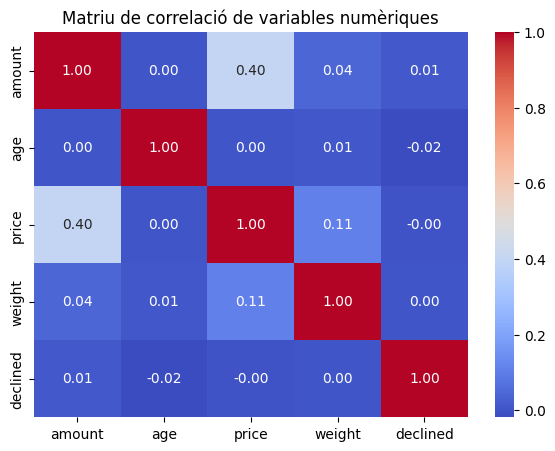

In [46]:
corr_matrix = df_corr.corr()

plt.figure(figsize=(7, 5))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Matriu de correlació de variables numèriques")
plt.show()

El preu del producte es variable amb més influència sobre l'import final, mentre que les característiques de l'usuari tenen un impacte molt limitat.
Amount-price = té una correlació positiva moderada, les transaccions amb productes més cars tendeixen a tenir imports totals més elevats.
Amount-weight = té una correlació feble, el pes del producte no influeix significativament en l'import de la transacció.
Age-amount = te una correlació molt baixa també, l'edat no té influència en la despesa.
Declined-amount = té una correlació positiva feble, sembla Les transaccions amb imports elevats tenen lleugerament més probabilitat de ser rebutjades,

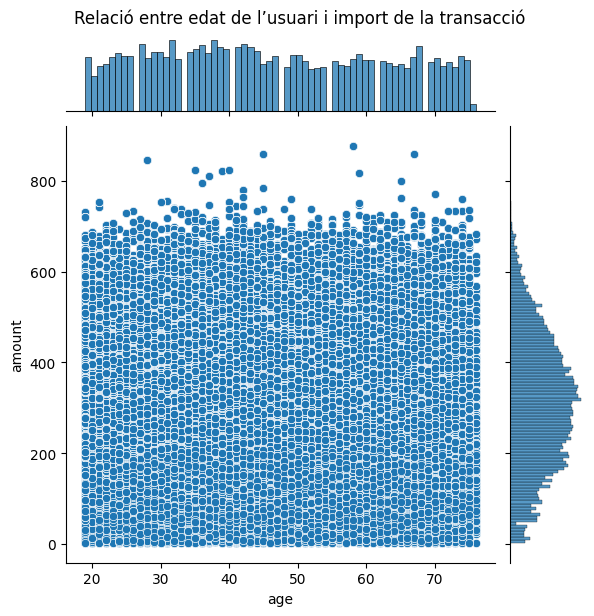

In [47]:
sns.jointplot(
    data=df_full,
    x="age",
    y="amount",
    kind="scatter",
    height=6
)

plt.suptitle(
    "Relació entre edat de l’usuari i import de la transacció",
    y=1.02
)
plt.show()

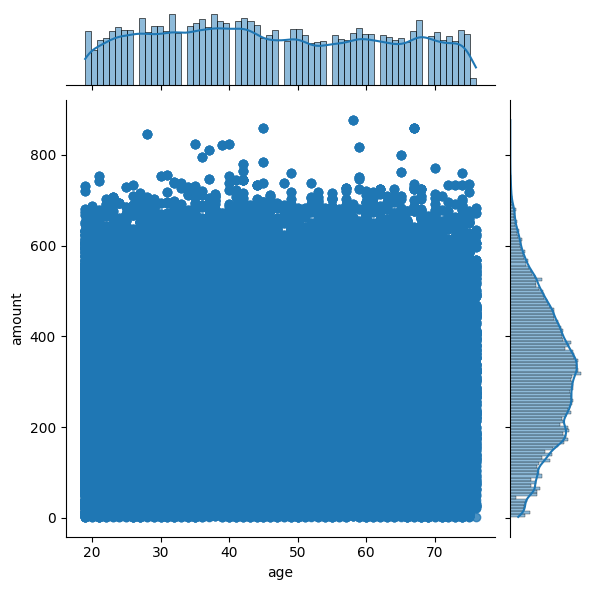

In [48]:
sns.jointplot(
    data=df_full,
    x="age",
    y="amount",
    kind="reg",
    height=6
)
plt.show()

No hi ha una relació clara entre l’edat de l’usuari i l’import gastat en una transacció. El núvol de punts mostra una gran dispersió per a totes les edats, també s'observa que la linea de regressió es gairabé plana indicant que la relació es molt feble. La major part de transaccions es concentren en imports baixos, independentment de l’edat,

**NIVEL III**

In [50]:
df_full.to_csv("datos_powerbi.csv", index=False)

In [51]:
import sys
print(sys.executable)

C:\Users\tpied\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe
